In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('bank-additional/bank-additional-full.csv')
data.head()

In [ ]:
label = ['age','job',"marital","education","default","housing","loan","contact","month","day_of_week","duration","campaign","pdays","previous","poutcome","emp.var.rate","cons.price.idx","cons.conf.idx","euribor3m","nr.employed","y"]
for i in data:
    value = data[i][:].str.split(';')

for i in range(len(value)):
    for j in range(len(value[i])):
        if '"' in value[i][j]:
            value[i][j] = value[i][j][1:-1]

In [ ]:
temp = []
for index in range(len(value)):
    index = pd.DataFrame({label[i]: [value[index][i]] for i in range(len(label))})
    temp.append(index)

result = pd.concat(temp, ignore_index=True)

In [ ]:
result.head()

In [ ]:
result.to_csv('original_data.csv')

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 20)) 
corr = data.corr()
h1 = sns.heatmap(corr, square=True, linewidths=.5, annot=True, fmt='.2f', cmap='coolwarm')

In [ ]:
from matplotlib import pyplot as plt
#
df1 = data.y.value_counts().plot(figsize = (5,5),kind='pie',legend= True,title='CRM Term Deposit',fontsize=15,autopct='%.2f')


# Check missing value

In [5]:
import pandas as pd 

data = pd.read_csv('original_data.csv')
data.head()

,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0,56,housemaid,married,basic.4y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,1,57,services,married,high.school,unknown,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,2,37,services,married,high.school,no,yes,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,3,40,admin.,married,basic.6y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,4,56,services,married,high.school,no,no,yes,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
missing_dict = {}
for col in data.columns:
    missing_dict[col] = 0
    for item in data[col]:
        if item == 'unknown':
            missing_dict[col] += 1

In [7]:
missing_dict

{'Unnamed: 0': 0,
 'age': 0,
 'job': 330,
 'marital': 80,
 'education': 1731,
 'default': 8597,
 'housing': 990,
 'loan': 990,
 'contact': 0,
 'month': 0,
 'day_of_week': 0,
 'duration': 0,
 'campaign': 0,
 'pdays': 0,
 'previous': 0,
 'poutcome': 0,
 'emp.var.rate': 0,
 'cons.price.idx': 0,
 'cons.conf.idx': 0,
 'euribor3m': 0,
 'nr.employed': 0,
 'y': 0}

# 1. Set missing data = unknown

In [8]:
udata = data.drop(['Unnamed: 0','emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'], axis = 1)

In [9]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, train_test_split

le1 = LabelEncoder()
for label in udata.columns:
    udata[label]= le1.fit_transform(udata[label])
    

In [10]:
from sklearn.model_selection import train_test_split 

ux = udata.drop('y', axis = 1)
uy = udata['y']

uX_train, uX_test, uY_train, uY_test = train_test_split(ux, uy, test_size = 0.2)

# 2. Using Decision Tree or Navie Bayes to impute missing value

In [32]:
pdata = pd.read_csv('original_data.csv')

In [33]:
pdata = pdata.drop(['Unnamed: 0','emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'], axis = 1)

In [34]:
col = pdata.columns.tolist()

In [35]:
from sklearn.preprocessing import LabelEncoder

le2 = LabelEncoder()
for label in pdata.columns:
    pdata[label]= le2.fit_transform(pdata[label])

## 1) Predict job missing value

In [36]:
job_missing = []
job_index = []

for i, row in pdata.iterrows():
    if row[1] == 11:
        job_missing.append(row)
        job_index.append(i)

In [38]:
job_data = pdata.drop(job_index)

In [39]:
job_test = pd.DataFrame(job_missing, columns = col)
job_test = job_test.drop('job', axis = 1)

In [42]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score

job_x = job_data.drop('job', axis = 1)
job_y = job_data['job']

X_train, X_test, Y_train, Y_test = train_test_split(job_x, job_y, test_size = 0.2)


DT = DecisionTreeClassifier()
DT.fit(X_train, Y_train)

from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
NB.fit(X_train, Y_train)

Y_pred1 = NB.predict(X_test)
Y_pred2 = DT.predict(X_test)

print('accuracy of DT:', accuracy_score(Y_test, Y_pred2))
print('accuracy of NB:', accuracy_score(Y_test, Y_pred1))


accuracy of DT: 0.4029613313754283
accuracy of NB: 0.35952031326480666


Since the predict accuracy is very low, we decide not to predict job missing value

## 2) Predict marital missing value

In [43]:
marital_missing = []
marital_index = []
for i, row in pdata.iterrows():
    if row[2] == 3:
        marital_missing.append(row)
        marital_index.append(i)

In [44]:
marital_data = pdata.drop(marital_index)

In [45]:
marital_test = pd.DataFrame(marital_missing, columns = col)
marital_test = marital_test.drop('marital', axis = 1)

In [46]:
marital_x = marital_data.drop('marital', axis = 1)
marital_y = marital_data['marital']
X_train, X_test, Y_train, Y_test = train_test_split(marital_x, marital_y, test_size = 0.2)


DT = DecisionTreeClassifier()
DT.fit(X_train, Y_train)

from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
NB.fit(X_train, Y_train)

Y_pred1 = NB.predict(X_test)
Y_pred2 = DT.predict(X_test)

print('accuracy of DT:', accuracy_score(Y_test, Y_pred2))
print('accuracy of NB:', accuracy_score(Y_test, Y_pred1))

accuracy of DT: 0.5861104354171734
accuracy of NB: 0.6286791534906349


Since navie bayes got an acceptable result, we use it to predict marital missing value

In [47]:
NB = GaussianNB()
NB.fit(marital_x, marital_y)

Y_pred3 = NB.predict(marital_test)

In [48]:
marital_test['marital'] = Y_pred3
pdata = pd.concat([marital_data, marital_test])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


## 3) Predict education missing value

In [49]:
education_missing = []
education_index = []

for i, row in pdata.iterrows():
    if row[6] == 7:
        education_missing.append(row)
        education_index.append(i)

In [51]:
education_data = pdata.drop(education_index)

education_test = pd.DataFrame(education_missing, columns = col)
education_test = education_test.drop('education', axis = 1)

In [52]:
education_x = education_data.drop('education', axis = 1)
education_y = education_data['education']
X_train, X_test, Y_train, Y_test = train_test_split(education_x, education_y, test_size = 0.2)


DT = DecisionTreeClassifier()
DT.fit(X_train, Y_train)

from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
NB.fit(X_train, Y_train)

Y_pred1 = NB.predict(X_test)
Y_pred2 = DT.predict(X_test)

print('accuracy of DT:', accuracy_score(Y_test, Y_pred2))
print('accuracy of NB:', accuracy_score(Y_test, Y_pred1))

accuracy of DT: 0.43411049163710086
accuracy of NB: 0.2659655347187025


Same as previous description, we don't predict education missing value

## 4) Predict default missing value

In [53]:
default_missing  = []
default_index = []

for i, row in pdata.iterrows():
    if row[4] == 1:
        default_missing.append(row)
        default_index.append(i)


In [54]:
default_data = pdata.drop(default_index)
default_test = pd.DataFrame(default_missing, columns = col)
default_test = default_test.drop('default', axis = 1)

In [55]:
default_x = education_data.drop('default', axis = 1)
default_y = education_data['default']
X_train, X_test, Y_train, Y_test = train_test_split(default_x, default_y, test_size = 0.2)


DT = DecisionTreeClassifier()
DT.fit(X_train, Y_train)

from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
NB.fit(X_train, Y_train)

Y_pred1 = NB.predict(X_test)
Y_pred2 = DT.predict(X_test)

print('accuracy of DT:', accuracy_score(Y_test, Y_pred2))
print('accuracy of NB:', accuracy_score(Y_test, Y_pred1))

accuracy of DT: 0.7208565636087176
accuracy of NB: 0.5115306639635073


Use Decision Tree to predict default missing value

In [56]:
DT = DecisionTreeClassifier()
DT.fit(default_x, default_y)
default_pred = DT.predict(default_test)


In [57]:
default_test['default'] = default_pred
pdata = pd.concat([default_data, default_test])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


## 5) Predict housing missing value

In [58]:
housing_missing = []
housing_index = []
for i, row in pdata.iterrows():
    if row[7] == 1:
        housing_missing.append(row)
        housing_index.append(i)


In [59]:
housing_data = pdata.drop(housing_index)
housing_test = pd.DataFrame(housing_missing, columns = col)
housing_test = housing_test.drop('housing', axis = 1)

In [60]:
housing_x = housing_data.drop('housing', axis = 1)
housing_y = housing_data['housing']
X_train, X_test, Y_train, Y_test = train_test_split(housing_x, housing_y, test_size = 0.2)


DT = DecisionTreeClassifier()
DT.fit(X_train, Y_train)

from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
NB.fit(X_train, Y_train)

Y_pred1 = NB.predict(X_test)
Y_pred2 = DT.predict(X_test)

print('accuracy of DT:', accuracy_score(Y_test, Y_pred2))
print('accuracy of NB:', accuracy_score(Y_test, Y_pred1))

accuracy of DT: 0.5064676616915423
accuracy of NB: 0.5322139303482587


## 6) Predict loan missing value

In [61]:
loan_missing = []
loan_index = []
for i, row in pdata.iterrows():
    if row[9] == 1:
        loan_missing.append(row)
        loan_index.append(i)

In [62]:
loan_data = pdata.drop(loan_index)
loan_test = pd.DataFrame(loan_missing, columns = col)
loan_test = loan_test.drop('loan', axis = 1)

In [63]:
loan_x = loan_data.drop('loan', axis = 1)
loan_y = loan_data['loan']
X_train, X_test, Y_train, Y_test = train_test_split(loan_x, loan_y, test_size = 0.2)


DT = DecisionTreeClassifier()
DT.fit(X_train, Y_train)

from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
NB.fit(X_train, Y_train)

Y_pred1 = NB.predict(X_test)
Y_pred2 = DT.predict(X_test)

print('accuracy of DT:', accuracy_score(Y_test, Y_pred2))
print('accuracy of NB:', accuracy_score(Y_test, Y_pred1))

accuracy of DT: 0.7215174129353233
accuracy of NB: 0.8442786069651741


In [64]:
NB = DecisionTreeClassifier()
NB.fit(loan_x, loan_y)
loan_pred = NB.predict(loan_test)

In [65]:
loan_test['loan'] = loan_pred
pdata = pd.concat([loan_data, loan_test])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


## 7) Predict poutcome missing value

In [66]:
poutcome_missing = []
poutcome_index = []
for i, row in pdata.iterrows():
    if row[13] == 1:
        poutcome_missing.append(row)
        poutcome_index.append(i)

In [67]:
poutcome_data = pdata.drop(poutcome_index)
poutcome_test = pd.DataFrame(poutcome_missing, columns = col)
poutcome_test = poutcome_test.drop('poutcome', axis = 1)

In [68]:
poutcome_x = poutcome_data.drop('poutcome', axis = 1)
poutcome_y = poutcome_data['poutcome']
X_train, X_test, Y_train, Y_test = train_test_split(poutcome_x, poutcome_y, test_size = 0.2)


DT = DecisionTreeClassifier()
DT.fit(X_train, Y_train)

from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
NB.fit(X_train, Y_train)

Y_pred1 = NB.predict(X_test)
Y_pred2 = DT.predict(X_test)

print('accuracy of DT:', accuracy_score(Y_test, Y_pred2))
print('accuracy of NB:', accuracy_score(Y_test, Y_pred1))

accuracy of DT: 0.968
accuracy of NB: 0.9635555555555556


In [69]:
DT = GaussianNB()
DT.fit(poutcome_x, poutcome_y)
poutcome_pred = DT.predict(poutcome_test)

In [70]:
poutcome_test['poutcome'] = poutcome_pred
pdata = pd.concat([poutcome_data, poutcome_test])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [71]:
from sklearn.model_selection import train_test_split 

px = pdata.drop('y', axis = 1)
py = pdata['y']

pX_train, pX_test, pY_train, pY_test = train_test_split(px, py, test_size = 0.2)

In [ ]:
y_1 = [y1, y2, y3, y4, y5]

# 3. Drop missing value

In [72]:
mdata = pd.read_csv('original_data.csv')

missing_list = []
for i in range(len(mdata.index)):
    if 'unknown' in mdata.iloc[i].values:
        missing_list.append(i)

In [73]:
mdata = mdata.drop(missing_list)
mdata = mdata.drop(['Unnamed: 0','emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'poutcome'], axis = 1)

In [74]:
from sklearn.preprocessing import LabelEncoder

le3 = LabelEncoder()
for label in mdata.columns:
    mdata[label]= le3.fit_transform(mdata[label])

In [75]:
mx = mdata.drop('y', axis = 1)
my = mdata['y']

mX_train, mX_test, mY_train, mY_test = train_test_split(mx, my, test_size = 0.2)

# 1. Accuracy of unknown policy without using PCA

In [77]:
from sklearn.neural_network import MLPClassifier

uml = MLPClassifier(activation = 'logistic', learning_rate = 'adaptive', max_iter = 1000, verbose = False)
uml.fit(uX_train, uY_train)

uy1 = uml.predict(uX_test)

from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.metrics import accuracy_score

au1 = accuracy_score(uY_test, uy1)

#print(classification_report(uY_test, uy1))
#print(confusion_matrix(uY_test, uy1))
print('accuracy of MLPNN:', au1)

from sklearn.naive_bayes import GaussianNB

unb = GaussianNB()
unb.fit(uX_train, uY_train)

uy2 = unb.predict(uX_test)
au2 = accuracy_score(uY_test, uy2) 

#print(classification_report(uY_test, uy2))
#print(confusion_matrix(uY_test, uy2))
print('accuracy of NB:', au2)

from sklearn.svm import SVC 

usvm = SVC()
usvm.fit(uX_train, uY_train)

uy3 = usvm.predict(uX_test)
au3 = accuracy_score(uY_test, uy3)

#print(classification_report(uY_test, uy3))
#print(confusion_matrix(uY_test, uy3))
print('accuracy of SVM:',au3)

from sklearn.neighbors import KNeighborsClassifier

uknn = KNeighborsClassifier(n_neighbors=5)
uknn.fit(uX_train, uY_train)

uy4 = uknn.predict(uX_test)
au4 = accuracy_score(uY_test, uy4)

#print(classification_report(uY_test, uy4))
#print(confusion_matrix(uY_test, uy4))
print('accuracy of KNN:', au4)

from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz

udt = DecisionTreeClassifier()
udt.fit(uX_train, uY_train)

uy5 = udt.predict(uX_test)
au5 = accuracy_score(uY_test, uy5) 

#print(classification_report(uY_test, uy5))
#print(confusion_matrix(uY_test, uy5))
print('accuracy of DT:', au5)

accuracy of MLPNN: 0.9079873755765963
accuracy of NB: 0.8685360524399126


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


accuracy of SVM: 0.888443797038116
accuracy of KNN: 0.9000971109492595
accuracy of DT: 0.8758193736343772


# 2. Accuracy of prediction policy without using PCA

In [78]:
from sklearn.neural_network import MLPClassifier

pml = MLPClassifier(activation = 'logistic', learning_rate = 'adaptive', max_iter = 1000, verbose = False)
pml.fit(pX_train, pY_train)

py1 = pml.predict(pX_test)

from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.metrics import accuracy_score

ap1 = accuracy_score(pY_test, py1)

#print(classification_report(uY_test, uy1))
#print(confusion_matrix(uY_test, uy1))
print('accuracy of MLPNN:', ap1)

from sklearn.naive_bayes import GaussianNB

pnb = GaussianNB()
pnb.fit(pX_train, pY_train)

py2 = pnb.predict(pX_test)
ap2 = accuracy_score(pY_test, py2) 

#print(classification_report(uY_test, uy2))
#print(confusion_matrix(uY_test, uy2))
print('accuracy of NB:', ap2)

from sklearn.svm import SVC 

psvm = SVC()
psvm.fit(pX_train, pY_train)

py3 = psvm.predict(pX_test)
ap3 = accuracy_score(pY_test, py3)

#print(classification_report(uY_test, uy3))
#print(confusion_matrix(uY_test, uy3))
print('accuracy of SVM:',ap3)

from sklearn.neighbors import KNeighborsClassifier

pknn = KNeighborsClassifier(n_neighbors=5)
pknn.fit(pX_train, pY_train)

py4 = uknn.predict(pX_test)
ap4 = accuracy_score(pY_test, py4)

#print(classification_report(uY_test, uy4))
#print(confusion_matrix(uY_test, uy4))
print('accuracy of KNN:', ap4)

from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz

pdt = DecisionTreeClassifier()
pdt.fit(pX_train, pY_train)

py5 = pdt.predict(pX_test)
ap5 = accuracy_score(pY_test, py5) 

#print(classification_report(uY_test, uy5))
#print(confusion_matrix(uY_test, uy5))
print('accuracy of DT:', ap5)

accuracy of MLPNN: 0.9049526584122359
accuracy of NB: 0.8962126729788784


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


accuracy of SVM: 0.8863801893663511
accuracy of KNN: 0.8867443554260743
accuracy of DT: 0.872784656470017


# 3. Accuracy of drop policy withoud using PCA

In [79]:
from sklearn.neural_network import MLPClassifier

mml = MLPClassifier(activation = 'logistic', learning_rate = 'adaptive', max_iter = 1000, verbose = False)
mml.fit(mX_train, mY_train)

my1 = mml.predict(mX_test)

from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.metrics import accuracy_score

am1 = accuracy_score(mY_test, my1)

#print(classification_report(uY_test, uy1))
#print(confusion_matrix(uY_test, uy1))
print('accuracy of MLPNN:', am1)

from sklearn.naive_bayes import GaussianNB

mnb = GaussianNB()
mnb.fit(mX_train, mY_train)

my2 = mnb.predict(mX_test)
am2 = accuracy_score(mY_test, my2) 

#print(classification_report(uY_test, uy2))
#print(confusion_matrix(uY_test, uy2))
print('accuracy of NB:', am2)

from sklearn.svm import SVC 

msvm = SVC()
msvm.fit(mX_train, mY_train)

my3 = msvm.predict(mX_test)
am3 = accuracy_score(mY_test, my3)

#print(classification_report(uY_test, uy3))
#print(confusion_matrix(uY_test, uy3))
print('accuracy of SVM:',am3)

from sklearn.neighbors import KNeighborsClassifier

mknn = KNeighborsClassifier(n_neighbors=5)
mknn.fit(mX_train, mY_train)

my4 = mknn.predict(mX_test)
am4 = accuracy_score(mY_test, my4)

#print(classification_report(uY_test, uy4))
#print(confusion_matrix(uY_test, uy4))
print('accuracy of KNN:', am4)

from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz

mdt = DecisionTreeClassifier()
mdt.fit(mX_train, mY_train)

my5 = mdt.predict(mX_test)
am5 = accuracy_score(mY_test, my5) 

#print(classification_report(uY_test, uy5))
#print(confusion_matrix(uY_test, uy5))
print('accuracy of DT:', am5)

accuracy of MLPNN: 0.8878320760905215
accuracy of NB: 0.8773368317481142


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


accuracy of SVM: 0.8696293866841588
accuracy of KNN: 0.8820924893407674
accuracy of DT: 0.8568383076418498


# Accuracy plot of three policy without using PCA

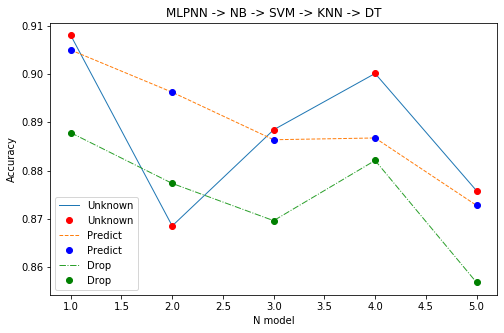

In [87]:
import matplotlib.pyplot as plt

x = [1, 2, 3 ,4 ,5 ]
y1 = [au1, au2, au3, au4, au5]
y2 = [ap1, ap2, ap3, ap4, ap5]
y3 = [am1, am2, am3, am4, am5]

plt.figure(figsize = (8, 5))
plt.plot(x,y1,"-",x,y1,"ro",linewidth=1, label = 'Unknown') 
plt.plot(x,y2,"--", x,y2,"bo",linewidth=1, label = 'Predict') 
plt.plot(x,y3,"-.",x,y3,"go",linewidth=1, label = 'Drop') 
plt.xlabel("N model") 
plt.ylabel("Accuracy") 
plt.title("MLPNN -> NB -> SVM -> KNN -> DT")  
plt.legend()
plt.show()  

From the comparison result, we can see using 'unknown' to replace missing value can get the highest result, 
however, using prediction method, it has the lowest deviation between each model
finally, directly dropping missing value cause the lowest accuracy

# Accuracy of unknown policy with PCA = 5

In [88]:
from sklearn.decomposition import PCA

upca = PCA(n_components=5)
ud = upca.fit_transform(uX_train)
ut = upca.fit_transform(uX_test)

In [90]:
from sklearn.neural_network import MLPClassifier

uml1 = MLPClassifier(activation = 'logistic', learning_rate = 'adaptive', max_iter = 1000, verbose = False)
uml1.fit(ud, uY_train)

uy11 = uml1.predict(ut)

from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.metrics import accuracy_score

au11 = accuracy_score(uY_test, uy11)

#print(classification_report(uY_test, uy1))
#print(confusion_matrix(uY_test, uy1))
print('accuracy of MLPNN:', au11)

from sklearn.naive_bayes import GaussianNB

unb1 = GaussianNB()
unb1.fit(ud, uY_train)

uy21 = unb1.predict(ut)
au21 = accuracy_score(uY_test, uy21) 

#print(classification_report(uY_test, uy2))
#print(confusion_matrix(uY_test, uy2))
print('accuracy of NB:', au21)

from sklearn.svm import SVC 

usvm1 = SVC()
usvm1.fit(ud, uY_train)

uy31 = usvm1.predict(ut)
au31 = accuracy_score(uY_test, uy31)

#print(classification_report(uY_test, uy3))
#print(confusion_matrix(uY_test, uy3))
print('accuracy of SVM:',au31)

from sklearn.neighbors import KNeighborsClassifier

uknn1 = KNeighborsClassifier(n_neighbors=5)
uknn1.fit(ud, uY_train)

uy41 = uknn1.predict(ut)
au41 = accuracy_score(uY_test, uy41)

#print(classification_report(uY_test, uy4))
#print(confusion_matrix(uY_test, uy4))
print('accuracy of KNN:', au41)

from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz

udt1 = DecisionTreeClassifier()
udt1.fit(ud, uY_train)

uy51 = udt1.predict(ut)
au51 = accuracy_score(uY_test, uy51) 

#print(classification_report(uY_test, uy5))
#print(confusion_matrix(uY_test, uy5))
print('accuracy of DT:', au51)

accuracy of MLPNN: 0.9025248846807478
accuracy of NB: 0.9033746054867686


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


accuracy of SVM: 0.888443797038116
accuracy of KNN: 0.8980335032774945
accuracy of DT: 0.7348871085214858


# Accuracy of predict policy with PCA = 5

In [91]:
from sklearn.decomposition import PCA

ppca = PCA(n_components=5)
pd = ppca.fit_transform(pX_train)
pt = ppca.fit_transform(pX_test)

In [92]:
from sklearn.neural_network import MLPClassifier

pml1 = MLPClassifier(activation = 'logistic', learning_rate = 'adaptive', max_iter = 1000, verbose = False)
pml1.fit(pd, pY_train)

py11 = pml1.predict(pt)

from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.metrics import accuracy_score

ap11 = accuracy_score(pY_test, py11)

#print(classification_report(uY_test, uy1))
#print(confusion_matrix(uY_test, uy1))
print('accuracy of MLPNN:', ap11)

from sklearn.naive_bayes import GaussianNB

pnb1 = GaussianNB()
pnb1.fit(pd, pY_train)

py21 = pnb1.predict(pt)
ap21 = accuracy_score(pY_test, py21) 

#print(classification_report(uY_test, uy2))
#print(confusion_matrix(uY_test, uy2))
print('accuracy of NB:', ap21)

from sklearn.svm import SVC 

psvm1 = SVC()
psvm1.fit(pd, pY_train)

py31 = psvm1.predict(pt)
ap31 = accuracy_score(pY_test, py31)

#print(classification_report(uY_test, uy3))
#print(confusion_matrix(uY_test, uy3))
print('accuracy of SVM:',ap31)

from sklearn.neighbors import KNeighborsClassifier

pknn1 = KNeighborsClassifier(n_neighbors=5)
pknn1.fit(pd, pY_train)

py41 = pknn1.predict(pt)
ap41 = accuracy_score(pY_test, py41)

#print(classification_report(uY_test, uy4))
#print(confusion_matrix(uY_test, uy4))
print('accuracy of KNN:', ap41)

from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz

pdt1 = DecisionTreeClassifier()
pdt1.fit(pd, pY_train)

py51 = pdt1.predict(pt)
ap51 = accuracy_score(pY_test, py51) 

#print(classification_report(uY_test, uy5))
#print(confusion_matrix(uY_test, uy5))
print('accuracy of DT:', ap51)

accuracy of MLPNN: 0.9054382131585337
accuracy of NB: 0.9019179412478757


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


accuracy of SVM: 0.8862588006797767
accuracy of KNN: 0.8997329448895363
accuracy of DT: 0.8624666181111921


# Accuracy of drop policy with PCA = 5

In [93]:
from sklearn.decomposition import PCA

mpca = PCA(n_components=5)
md = mpca.fit_transform(mX_train)
mt = mpca.fit_transform(mX_test)

In [94]:
from sklearn.neural_network import MLPClassifier

mml1 = MLPClassifier(activation = 'logistic', learning_rate = 'adaptive', max_iter = 1000, verbose = False)
mml1.fit(md, mY_train)

my11 = mml1.predict(mt)

from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.metrics import accuracy_score

am11 = accuracy_score(mY_test, my11)

#print(classification_report(uY_test, uy1))
#print(confusion_matrix(uY_test, uy1))
print('accuracy of MLPNN:', am11)

from sklearn.naive_bayes import GaussianNB

mnb1 = GaussianNB()
mnb1.fit(md, mY_train)

my21 = mnb1.predict(mt)
am21 = accuracy_score(mY_test,my21) 

#print(classification_report(uY_test, uy2))
#print(confusion_matrix(uY_test, uy2))
print('accuracy of NB:', am21)

from sklearn.svm import SVC 

msvm1 = SVC()
msvm1.fit(md, mY_train)

my31 = msvm1.predict(mt)
am31 = accuracy_score(mY_test, my31)

#print(classification_report(uY_test, uy3))
#print(confusion_matrix(uY_test, uy3))
print('accuracy of SVM:',am31)

from sklearn.neighbors import KNeighborsClassifier

mknn1 = KNeighborsClassifier(n_neighbors=5)
mknn1.fit(md, mY_train)

my41 = mknn1.predict(mt)
am41 = accuracy_score(mY_test, my41)

#print(classification_report(uY_test, uy4))
#print(confusion_matrix(uY_test, uy4))
print('accuracy of KNN:', am41)

from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz

mdt1 = DecisionTreeClassifier()
mdt1.fit(md, mY_train)

my51 = mdt1.predict(mt)
am51 = accuracy_score(mY_test, my51) 

#print(classification_report(uY_test, uy5))
#print(confusion_matrix(uY_test, uy5))
print('accuracy of DT:', am51)

accuracy of MLPNN: 0.8893079698261726
accuracy of NB: 0.884388324040669


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


accuracy of SVM: 0.8693014102984585
accuracy of KNN: 0.8781567727123647
accuracy of DT: 0.8004263693014103


# Accuracy plot of three policy with PCA

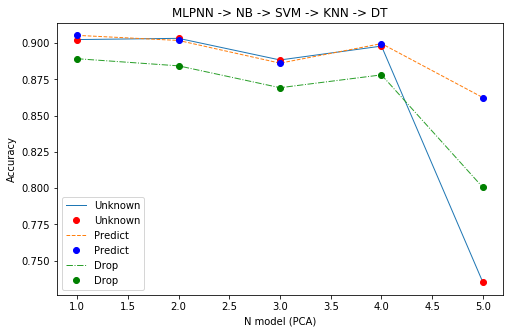

In [97]:
import matplotlib.pyplot as plt

x = [1, 2, 3 ,4 ,5 ]
y11 = [au11, au21, au31, au41, au51]
y21 = [ap11, ap21, ap31, ap41, ap51]
y31 = [am11, am21, am31, am41, am51]

plt.figure(figsize = (8, 5))
plt.plot(x,y11,"-",x,y11,"ro",linewidth=1, label = 'Unknown') 
plt.plot(x,y21,"--", x,y21,"bo",linewidth=1, label = 'Predict') 
plt.plot(x,y31,"-.",x,y31,"go",linewidth=1, label = 'Drop') 
plt.xlabel("N model (PCA)")   
plt.ylabel("Accuracy")   
plt.title("MLPNN -> NB -> SVM -> KNN -> DT")   
plt.legend()
plt.show()    

# PCA comparison

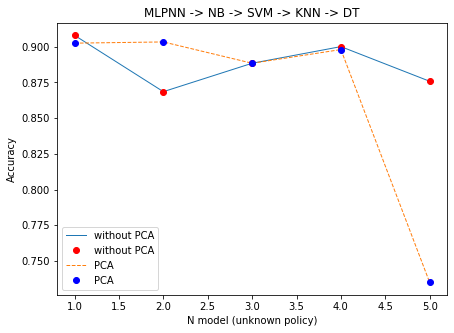

In [100]:
x1 = [1, 2, 3, 4, 5]
uwp = [au1, au2, au3, au4, au5]
up = [au11, au21, au31, au41, au51]

plt.figure(figsize = (7, 5))
plt.plot(x1,uwp,"-",x1,uwp,"ro",linewidth=1, label = 'without PCA') 
plt.plot(x1,up,"--", x1,up,"bo",linewidth=1, label = 'PCA') 

plt.xlabel("N model (unknown policy)")  
plt.ylabel("Accuracy")  
plt.title("MLPNN -> NB -> SVM -> KNN -> DT") 
plt.legend()
plt.show()  

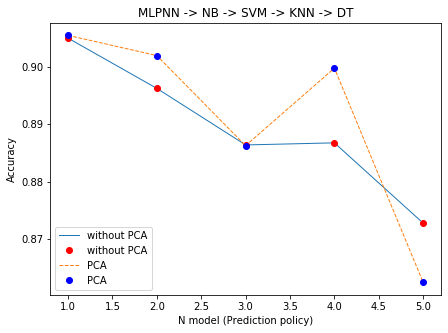

In [101]:
x2 = [1, 2, 3, 4, 5]
pwp = [ap1, ap2, ap3, ap4, ap5]
pp = [ap11, ap21, ap31, ap41, ap51]

plt.figure(figsize = (7, 5))
plt.plot(x2,pwp,"-",x2,pwp,"ro",linewidth=1, label = 'without PCA') 
plt.plot(x2,pp,"--", x2,pp,"bo",linewidth=1, label = 'PCA') 

plt.xlabel("N model (Prediction policy)") 
plt.ylabel("Accuracy")  
plt.title("MLPNN -> NB -> SVM -> KNN -> DT")
plt.legend()
plt.show()  

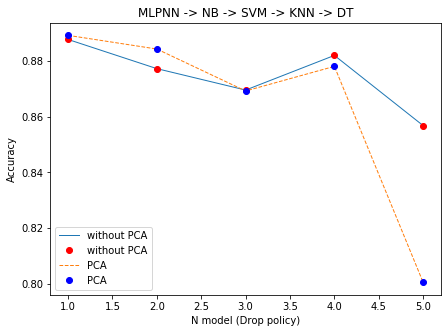

In [102]:
x3 = [1, 2, 3, 4, 5]
mwp = [am1, am2, am3, am4, am5]
mp = [am11, am21, am31, am41, am51]

plt.figure(figsize = (7, 5))
plt.plot(x3,mwp,"-",x3,mwp,"ro",linewidth=1, label = 'without PCA') 
plt.plot(x3,mp,"--", x3,mp,"bo",linewidth=1, label = 'PCA') 

plt.xlabel("N model (Drop policy)")  
plt.ylabel("Accuracy")   
plt.title("MLPNN -> NB -> SVM -> KNN -> DT") 
plt.legend()
plt.show()  

In [108]:
"""
x4 = [1, 2, 3 ,4 ,5 ]
y111 = [au11, au21, au31, au41, au51]
y222 = [ap11, ap21, ap31, ap41, ap51]
y333 = [am11, am21, am31, am41, am51]

y1111 = [au1, au2, au3, au4, au5]
y2222 = [ap1, ap2, ap3, ap4, ap5]
y3333 = [am1, am2, am3, am4, am5]

plt.figure(figsize = (10, 8))
plt.plot(x4,y111,x4,y111,linewidth=1, label = 'Unknown(PCA)') 
plt.plot(x4,y222, x4,y222,linewidth=1, label = 'Predict(PCA)') 
plt.plot(x4,y333,x4,y333,linewidth=1, label = 'Drop(PCA)') 

plt.plot(x4,y1111,x4,y1111,linewidth=1, label = 'Unknown') 
plt.plot(x4,y2222, x4,y2222,linewidth=1, label = 'Predict') 
plt.plot(x4,y3333,x4,y3333,linewidth=1, label = 'Drop') 

plt.xlabel("N model (PCA)")  
plt.ylabel("Accuracy")   
plt.title("MLPNN -> NB -> SVM -> KNN -> DT") 
plt.legend()
plt.show() 
"""

'\nx4 = [1, 2, 3 ,4 ,5 ]\ny111 = [au11, au21, au31, au41, au51]\ny222 = [ap11, ap21, ap31, ap41, ap51]\ny333 = [am11, am21, am31, am41, am51]\n\ny1111 = [au1, au2, au3, au4, au5]\ny2222 = [ap1, ap2, ap3, ap4, ap5]\ny3333 = [am1, am2, am3, am4, am5]\n\nplt.figure(figsize = (10, 8))\nplt.plot(x4,y111,x4,y111,linewidth=1, label = \'Unknown(PCA)\') \nplt.plot(x4,y222, x4,y222,linewidth=1, label = \'Predict(PCA)\') \nplt.plot(x4,y333,x4,y333,linewidth=1, label = \'Drop(PCA)\') \n\nplt.plot(x4,y1111,x4,y1111,linewidth=1, label = \'Unknown\') \nplt.plot(x4,y2222, x4,y2222,linewidth=1, label = \'Predict\') \nplt.plot(x4,y3333,x4,y3333,linewidth=1, label = \'Drop\') \n\nplt.xlabel("N model (PCA)")  \nplt.ylabel("Accuracy")   \nplt.title("MLPNN -> NB -> SVM -> KNN -> DT") \nplt.legend()\nplt.show() \n'

# ROC

In [109]:
ML1_score = uml.predict_proba(uX_test)
NB1_score = unb.predict_proba(uX_test)
SVM1_score = usvm.decision_function(uX_test)
KNN1_score = uknn.predict_proba(uX_test)
DT1_score = udt.predict_proba(uX_test)

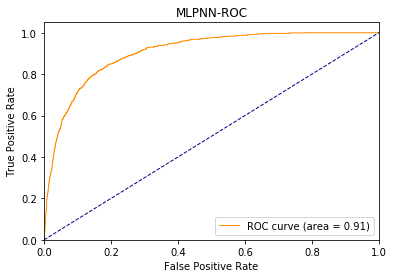

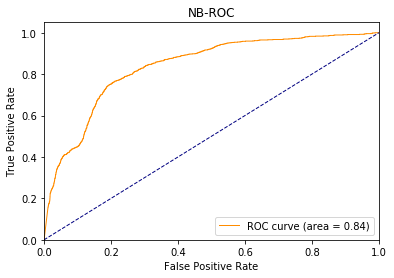

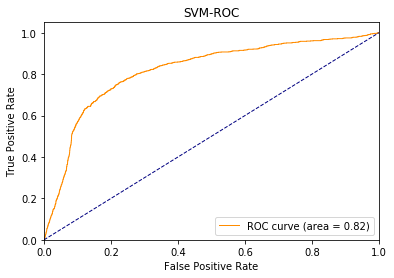

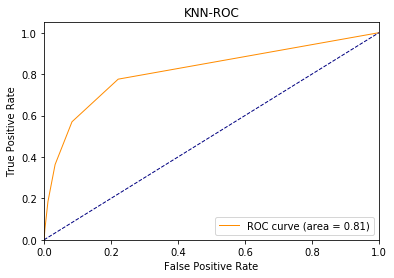

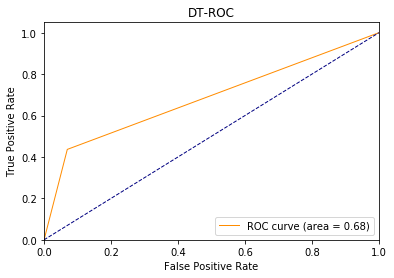

In [111]:
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(uY_test, ML1_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
lw = 1
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('MLPNN-ROC')
plt.legend(loc="lower right")
plt.show()

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(uY_test, NB1_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
lw = 1
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('NB-ROC')
plt.legend(loc="lower right")
plt.show()

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(uY_test, SVM1_score)
    roc_auc[i] = auc(fpr[i], tpr[i])

lw = 1
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM-ROC')
plt.legend(loc="lower right")
plt.show()

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(uY_test, KNN1_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

lw = 1
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN-ROC')
plt.legend(loc="lower right")
plt.show()

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(uY_test, DT1_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

lw = 1
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('DT-ROC')
plt.legend(loc="lower right")
plt.show()